<a href="https://colab.research.google.com/github/202011988/DAP__/blob/main/%EA%B5%AD%EB%82%B4_%EC%9D%B4%EC%8A%88_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from dateutil.parser import parse
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# 코드 출처 : https://jonsyou.tistory.com/22 - [Python] Colab 에서 matplotlib 한글 폰트 정상 출력시키는 코드
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


#Project : 국내 이슈 데이터


##Topic 1 : 혜화역 장애인 시위

최근 혜화역에서 '교통약자 이동편의 증진법'을 촉구해달라는 장애인 단체의 시위가 있었습니다.

이로 인해 시민들이 출근에 심한 불편을 겪었다는 의견과 정당한 시위였다는 의견이 대립을 이루었는데요.

과연 이 시위가 정당한 행위였는지 확인해보기 위해 주제를 선정했습니다.

우선 정부가 어떤 복지사업을 시행하고 있는지 조사하기 위해, 가장 비율이 높은 장애 유형 하나를 선정하였습니다.



> [CSV 출처 : 복지로]



In [3]:
df = pd.read_csv('202110.csv', encoding='cp949')
df

,통계년월,통계시도명,통계시군구명,장애유형,성별,등록장애인수
0,202110,서울특별시,종로구,지체,남자,1368
1,202110,서울특별시,종로구,청각,여자,414
2,202110,서울특별시,종로구,언어,남자,30
3,202110,서울특별시,종로구,언어,여자,12
4,202110,서울특별시,종로구,지적,남자,229
...,...,...,...,...,...,...
6768,202110,제주특별자치도,서귀포시,시각,남자,704
6769,202110,제주특별자치도,서귀포시,장루.요루,여자,37
6770,202110,제주특별자치도,서귀포시,뇌전증,남자,19
6771,202110,제주특별자치도,서귀포시,뇌전증,여자,21


장애유형별 장애인 비율을 조사하기 위해 데이터를 월별 등록 장애인 수의 평균으로 그룹화하였습니다.

In [4]:
df2 = df.groupby('장애유형').agg(np.mean)
df2 = pd.DataFrame(df2['등록장애인수'])
df2

,등록장애인수
장애유형,
간,31.594714
뇌병변,542.510917
뇌전증,15.629139
시각,549.500000
신장,221.338428
심장,12.121495
안면,6.473684
언어,50.085153
자폐성,73.870246


이후 시각화를 위해 Pie Chart를 사용하였습니다.

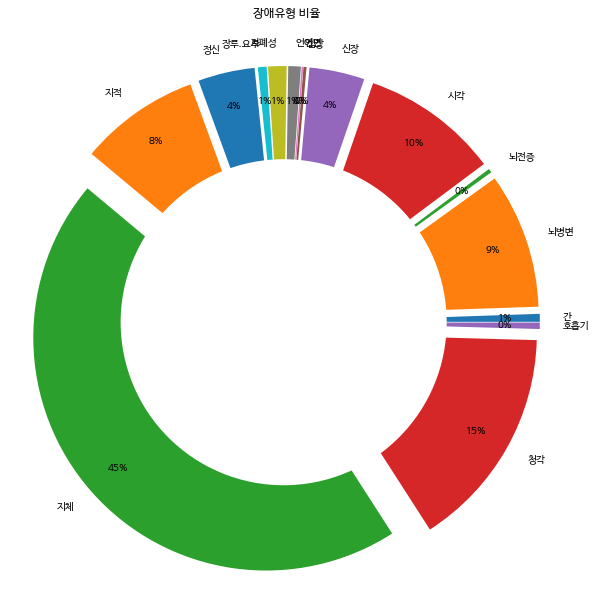

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(
    df2['등록장애인수'],
    labels = df2.index,
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),
    autopct = '%1.f%%',
    pctdistance = 0.85

)

centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title("장애유형 비율\n\n")
plt.show()


국내에서는 지체장애인이 약 45%의 비율로 가장 많다는 결과가 나왔습니다.

장애인단체에서는 시위에서 지하철역에 앨리베이터를 설치해달라는 요구를 하였는데요,

이와 관련하여 국내 노선별 역 앨리베이터 설치율을 조사하였습니다.

In [49]:
df = pd.read_csv('한국철도공사_노선별 엘리베이터 설치현황_20181231.csv', encoding='cp949')
df

,노선,역수,설치역수,수량,역 설치율(%)
0,경부선,37.0,36.0,178.0,95.0
1,경원선,23.0,20.0,74.0,83.0
2,경인선,20.0,19.0,74.0,95.0
3,시흥연결선,NaN,NaN,NaN,NaN
4,병점기지선,1.0,1.0,2.0,100.0
5,천안직결선,NaN,NaN,NaN,NaN
6,장항선,6.0,6.0,22.0,100.0
7,일산선,11.0,10.0,41.0,91.0
8,과천선,8.0,8.0,32.0,100.0
9,안산선,13.0,13.0,33.0,100.0


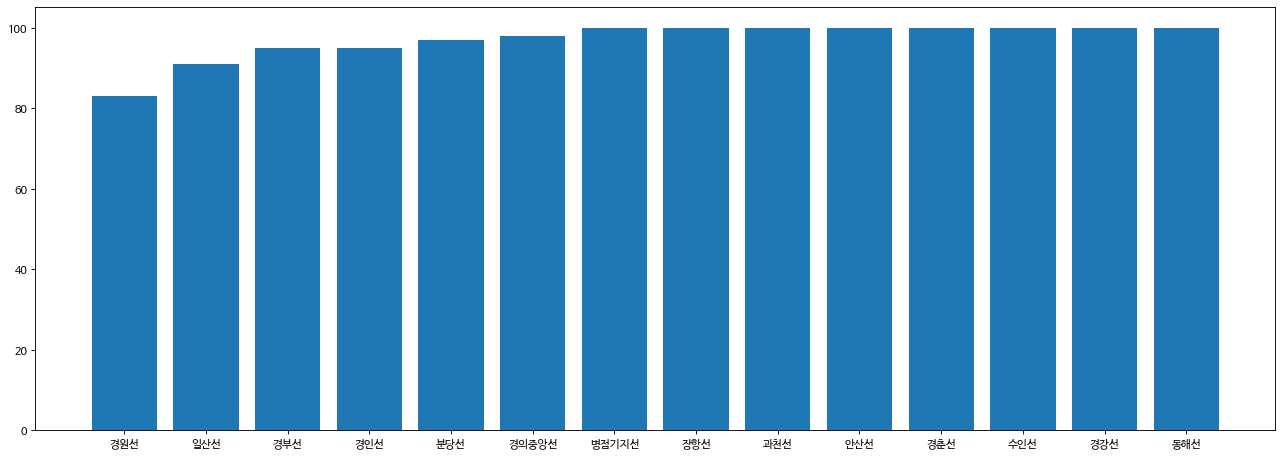

In [50]:

df = df.dropna(subset = ['역 설치율(%)'])
df = df.sort_values(by='역 설치율(%)')

plt.subplots(figsize =(20, 7), dpi = 80)
plt.bar(df['노선'], df['역 설치율(%)'])
plt.show()

NaN값을 제외하면 경원선과 일산선 이외에는 90% 이상의 설치 비율을 보여주었습니다.

데이터에 대한 개인적인 의견 등은 서술하지 않겠습니다.

##Topic 2 : 오징어 게임

황동혁 감독이 만든 넷플릭스 오리지널 한국 드라마, 오징어게임은 엄청난 흥행으로 넷플릭스에서 가장 많은 시청 가구수를 기록한 콘텐츠가 되었습니다.

특히 오징어게임의 주제가 되었던 국내 놀이 문화들이 세계적으로 많은 이슈가 되었는데요.

오징어게임의 인기도를 확인하기 위해 SNS 트위터에서 날짜별로 얼마나 인기 많은 사람들이 오징어게임을 언급했는지 조사해 보았습니다.

> [CSV 출처 : kaggle]

In [15]:
df = pd.read_csv('tweets_v8.csv', parse_dates=['date'], index_col = 'date')
df = df[df.index >= "2021-09-17"]
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet
date,,,,,,,,,,,
2021-10-06 12:05:38+00:00,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,When life hits and the same time poverty strik...,Twitter for Android,False
2021-10-06 12:05:22+00:00,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2021-10-06 12:05:22+00:00,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,#Squidgame time,Twitter Web App,False
2021-10-06 12:05:04+00:00,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
2021-10-06 12:05:00+00:00,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,"The two first games, players were killed by th...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28 13:46:26+00:00,Sale X Low,USA,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
2021-10-28 13:45:38+00:00,RevAAA,NaN,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
2021-10-28 13:45:00+00:00,Omo K-Pop News,NaN,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False


기간이 짧아 1일 기준으로, 범위가 넓을 것으로 예상하여 Scatter Plot으로 가시화 하였습니다.

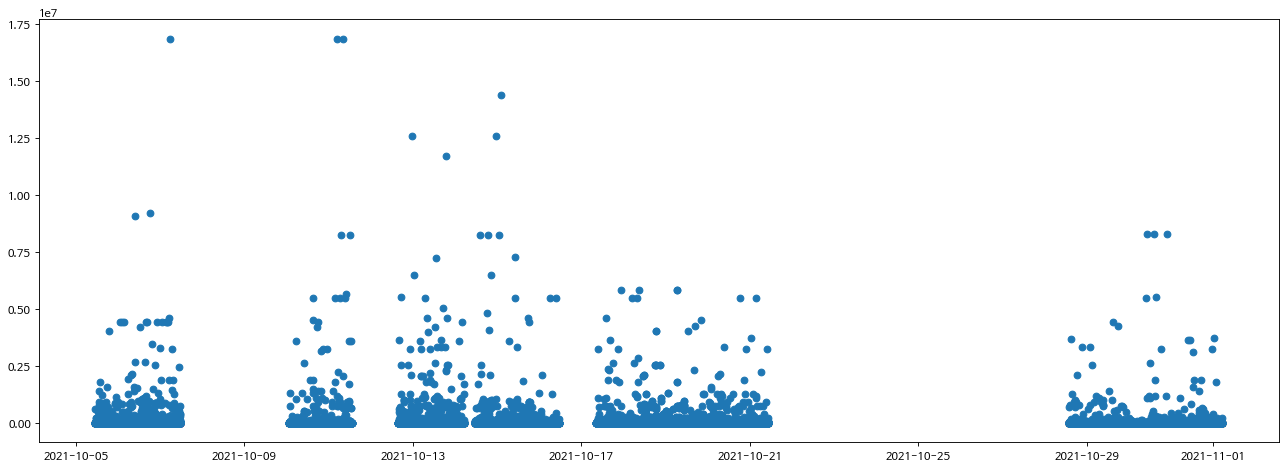

In [ ]:
df['week'] = [d.strftime('%W') for d in df.index]
#df.sort_values(by=['date'], axis = 0)
#df
fig = plt.subplots(figsize =(20, 7), dpi = 80)
plt.scatter (x = df.index, y = 'user_followers', data = df)
plt.show()

오징어 게임의 인기가 올라감에 따라 셀럽 등 팔로우가 많은 사람들의 영향이 있을 것으로 예상했지만, 데이터의 구간이 짧고 빈 데이터 구간 등 변수가 많아 정확환 확인이 어려워 아쉬움이 남았습니다.

##Topic 3 : 요소수 대란

요즘에 출시된 경유 자동차에는 대기 오염을 줄이기 위해 요소수를 보충해야만 시동이 걸리도록 만들어져 있습니다.

그런데 최근 중국에서 요소수의 수입이 불가능해지면서 품귀 현상이 일어났는데요, 현재까지도 품귀가 계속되고 있는지 확인해보기 위해 요소수의 가격과 재고 상황을 분석해 보았습니다.



> [CSV 출처 : 경기데이터드림]

> 잔량 수량 구간 구분
*   (GREEN)초록: 여유
*   (YELLOW)노랑: 보통
*   (RED)빨강: 부족
*   (GRAY)회색: 매진











In [67]:
df = pd.read_csv('요소수중점유통주유소재고현황.csv', encoding='cp949')

#df[ df['요소수가격'] == "undefined"].index
df = df.drop(df[ df['요소수가격'] == "undefined"].index)

df

,주유소 주소,주유소 코드,재고량(ℓ),주유소 위도,주유소 경도,주유소 이름,영업시간,요소수가격,업데이트 일시,주유소 전화번호,잔량 수량 구간
0,경남 산청군 단성면 지리산대로 2336,A0030108,1434,35.271300,127.888888,지리산주유소,NaN,2000,2021-12-16 18:00:55,055-973-8607,GREEN
1,경남 사천시 삼천포대교로 692,A0030117,830,34.958298,128.072661,(주)하나주유소,NaN,1200,2021-12-16 19:28:57,055-835-4322,YELLOW
2,경남 산청군 단성면 통영대전고속도로76,A0030119,1200,35.333508,127.938981,산청(하남방향),매일 24시간,1200,2021-12-16 18:43:25,055-973-6138,GREEN
3,경남 사천시 사남면사천대로 1654,A0030137,550,35.066175,128.075072,(주)월성주유소,NaN,1500,2021-12-16 16:19:07,055-852-4243,YELLOW
4,경남 하동군 진교면 경충로 1065,A0030158,862,35.028595,127.904839,금오농협 진교지점 주유소,NaN,1200,2021-12-16 20:59:25,055-883-5182,YELLOW
...,...,...,...,...,...,...,...,...,...,...,...
1184,경기 평택시 고덕면 서동대로 2531,A0002765,150,37.017896,127.020911,한길주유소,NaN,2000,2021-12-07 11:04:33,031-662-2323,RED
1185,평택시 포승읍 포승공단로 68,A0002768,1500,36.977896,126.843358,포승행복주유소,"04:00~22:00(평일,토), 06:00~22:00(일)",1300,2021-12-16 19:45:22,031-681-5022,GREEN
1186,경기 안성시 서동대로 5046 (신소현동),A0002785,120,37.023041,127.258173,신도시주유소,NaN,1300,2021-12-16 16:20:42,031-676-5193,RED
1187,경기 평택시 포승읍 불당길 132,A0002820,1977,36.988659,126.864957,서평택IC셀프주유소,NaN,1500,2021-12-16 12:06:46,031-681-9060,GREEN


요소수 가격의 폭과 이상점 등을 확인하기 위해 Box Plot을 활용하였습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


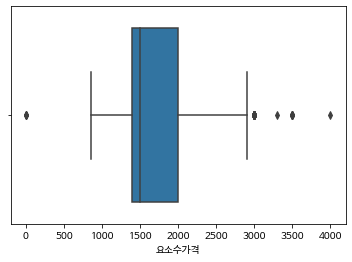

In [71]:
df2 = pd.DataFrame(pd.to_numeric(df['요소수가격']))


ax = sns.boxplot("요소수가격", data = df2)


plt.show()

쉬운 정렬을 위해 재고 구간을 숫자로 인코딩 후 Bar Chart로 시각화 하였습니다.

요소수 가격이 보통 1,500원에서 2,000원 내외라는 점을 확인했습니다.

<BarContainer object of 4 artists>

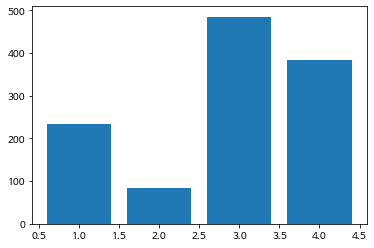

In [72]:
Stock_dict = { 'GRAY' : 1,
               'RED' : 2,
               'YELLOW' : 3,
               'GREEN' : 4}

df['재고구분'] = df['잔량 수량 구간'].map(Stock_dict)
freq = df['재고구분'].value_counts()
plt.bar(freq.index, freq)

보통 - 여유 - 매진 - 부족 순으로 재고를 보유한 주유소가 많다는 점을 확인했습니다.

요소수 품귀현상이 어느 정도 해소되었음을 알 수 있습니다.

##Topic 4. 제주도 지진
최근 제주도에서 규모 4.9의 큰 지진이 발생하였습니다.

더 이상 대한민국도 지진 안전지대가 아니라는 평가가 나오고 있는 상황인데요,

연도의 변화에 따라 지진의 위험성이 커지고 있는지 알아보기 위해 연도별 규모를 boxpot으로 나타냈습니다.

> [CSV 출처 : 기상청]

In [99]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('EQK_지진정보_20211221171427.csv', parse_dates=['시간'], encoding='cp949')

df

,시간,규모,진앙(km),위도,경도,위치
0,2012-01-01 19:40:31,2.0,0,39.02,125.82,북한 평양 동쪽 6km 지역
1,2012-01-16 03:03:54,2.2,17,36.79,128.75,경북 안동시 북쪽 25km 지역
2,2012-01-19 15:43:00,2.7,13,38.51,126.23,북한 황해북도 평산 북서쪽 24km 지역
3,2012-01-24 02:41:53,2.2,15,37.12,125.96,인천 옹진군 덕적도 서남서쪽 20km 해역
4,2012-02-19 20:21:29,2.7,17,35.13,129.89,울산 동구 남동쪽 59km 해역
...,...,...,...,...,...,...
1047,2021-12-09 10:57:47,2.6,17,33.85,125.51,전남 신안군 흑산도 남쪽 91km 해역
1048,2021-12-14 17:19:14,4.9,17,33.09,126.16,제주 서귀포시 서남서쪽 41km 해역
1049,2021-12-15 15:06:47,2.8,14,33.14,126.15,제주 서귀포시 서남서쪽 40km 해역
1050,2021-12-15 22:02:14,2.3,10,35.79,127.80,경남 거창군 북서쪽 15km 지역


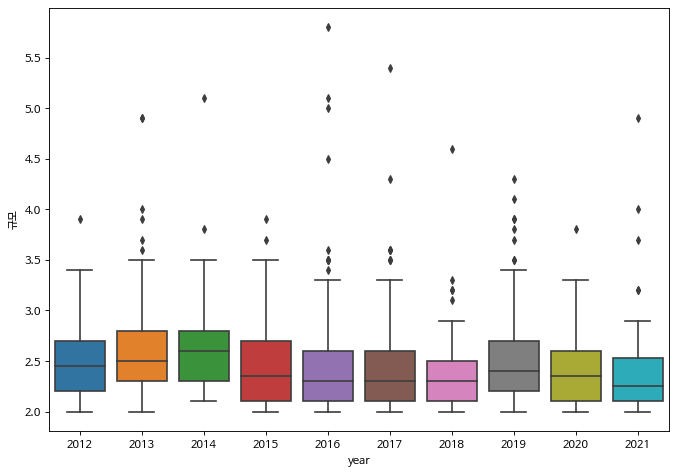

In [98]:

df['year'] = [d.year for d in df["시간"]]



plt.subplots(figsize = (10, 7), dpi = 80)
sns.boxplot(x = 'year', y = '규모', data = df)

plt.show()


연도의 변화와 지진 규모는 크게 연관성이 없는 것으로 보입니다.

국내 위도 경도 별 어느 구간이 지진이 더 자주, 크게 일어나는지 확인하기 위해 bubble plot을 사용하여 가시화하였습니다.

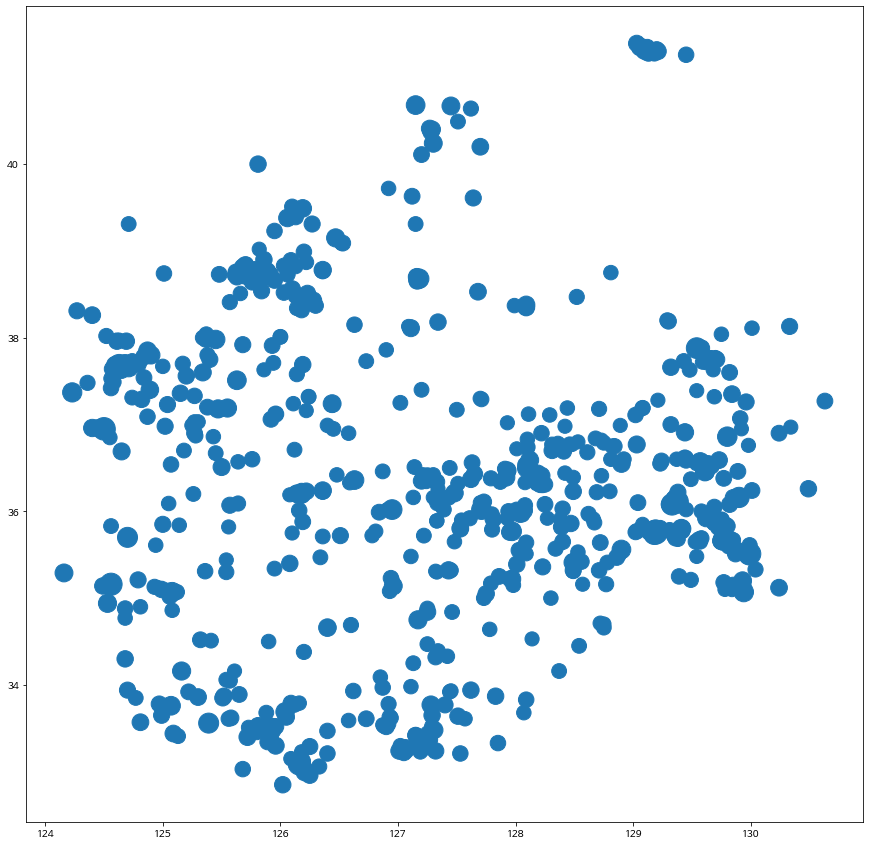

In [100]:

plt.subplots(figsize=(15,15))
plt.scatter(
    x = df["경도"],
    y = df["위도"],
    s = df["규모"] * 100,
    
)

plt.show()

빈도수의 경우 동쪽 남부지역들 중심으로 지진이 자주 일어났고, 규모의 경우 원의 크기가 명확하게 보이지 않아 확실한 시각화가 되지 못해 아쉬웠습니다.

##Topic 5 : 위드코로나
최근 정부에서 단계적 일상 회복을 발표하고 위드코로나 시행을 시작했지만  코로나 확진자가 다시 급증하면서 계획의 찬성과 반대 의견이 대립하고 있는 상황입니다.

이와 관련하여 국내의 위드코로나 시행이 적절했는지 알아보기 위해 주제를 선정했습니다.

위드코로나 선결 조건의 일부인 백신 접종률에 대해 데이터를 분석하였습니다.



> [CSV 출처 : 서울 열린데이터 광장]



In [4]:
df = pd.read_csv('서울특별시 코로나19 백신 예방접종 현황.csv', encoding='cp949', parse_dates=['접종일'], index_col = '접종일')

2021년 10월 29일 이전에는 추가접종 시행 이전이므로 이에 대한 데이터가 존재하지 않아 NaN값을 0.0으로 채워 주웠습니다.

In [5]:
df = df.fillna(0)
df

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
접종일,,,,,,,,,,
2021-12-15,9505868,11851.0,8034078,84.5,7820.0,7815332,82.2,170057.0,1663071.0,17.5
2021-12-15,9505868,8483.0,8034078,84.5,6705.0,7815332,82.2,139233.0,1663071.0,17.5
2021-12-14,9505868,11156.0,8008859,84.3,10094.0,7795782,82.0,143908.0,1344229.0,14.1
2021-12-13,9505868,304.0,8008859,84.3,284.0,7795782,82.0,1826.0,1344229.0,14.1
2021-12-12,9505868,4597.0,7994449,84.1,6048.0,7782371,81.9,59658.0,1199359.0,12.6
...,...,...,...,...,...,...,...,...,...,...
2021-04-25,1023346,23323.0,350631,34.2,3411.0,18513,1.8,0.0,0.0,0.0
2021-04-24,1023346,200.0,350427,34.2,0.0,18513,1.8,0.0,0.0,0.0
2021-04-23,1027740,10195.0,345764,33.6,119.0,18376,1.8,0.0,0.0,0.0


In [7]:
!pip install dash
!pip install jupyter_dash

#def plot_df(df, x, y, title = "", xlabel = 'Date', ylabel = 'Value', dpi = 100) :
#    plt.figure(figsize=(16, 5), dpi = dpi)
#    plt.plot(x, y, color = 'tab:red')
#    plt.gca().set(title=title, xlabel = xlabel, ylabel = ylabel)
#    plt.show()
#
#plot_df(df, x=df.index, xlabel = "날짜", ylabel = "2차 접종률(%)", y = df['2차접종률(%)'] )
#(dash로 재구성)

     |████████████████████████████████| 7.3 MB 5.0 MB/s 
     |████████████████████████████████| 26.5 MB 1.7 MB/s 
     |████████████████████████████████| 357 kB 61.3 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=e634852d9c725e2214b7a9be48111ef4bba1ed86a77beb9a397411f1d7be5c39
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=a13bcc68823a54b9d6e89b0935366b7ba922bb334ebc16d6e9f7288f7d4fcad1
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=a307a0bbeed49655fdc858aecefda4c013ebe25615bdfbc7ad043ae439b21b96
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

날짜 별 1차 백신 접종률, 2차 백신 접종률, 추가 접종률 3가지를 Dash로 표현하였습니다.

In [8]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = '코로나 백신 접종률',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown',
                                               options = [{'label':'1차접종률(%)', 'value':'1차접종률(%)' },
                                                          {'label':'2차접종률(%)', 'value':'2차접종률(%)'},
                                                          {'label':'추가접종률(%)', 'value':'추가접종률(%)'},],
                                               value = '2차접종률(%)'),
                                  dcc.Graph(id = 'bar_plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Scatter(x = df.index, y = df['{}'.format(dropdown_value)], \
                    line = dict(color = 'firebrick', width = 4))
                    ])
    
    fig.update_layout(xaxis_title = '날짜',
                      yaxis_title = '접종률 (%)'
                      )

    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>

>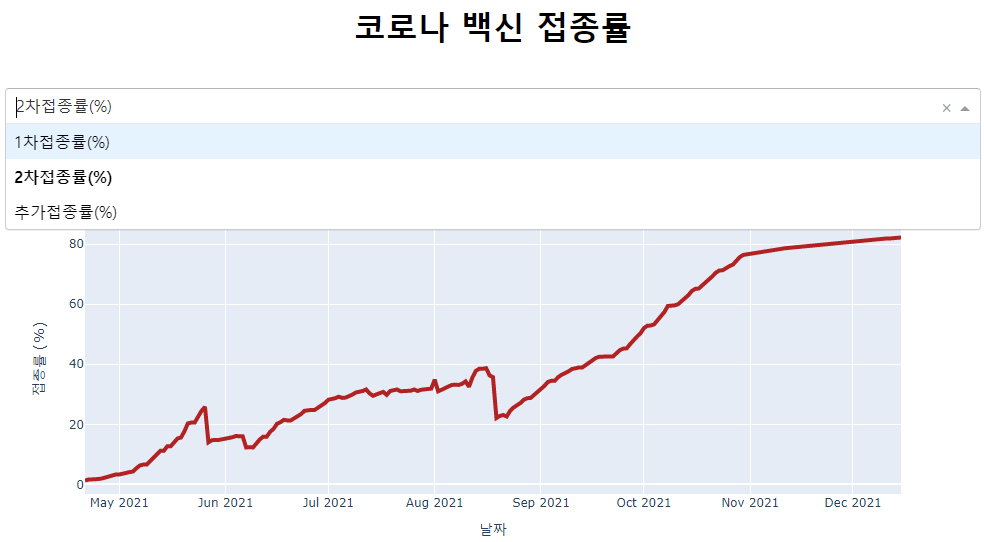[참고 : Dash 실행 화면]




y값이 접종 대상자 기준의 접종률을 나타내고 있기 때문에 중간중간 그래프의 비율이 내려가는 모양을 보여주었습니다.